# Imports

In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import  LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

%matplotlib inline
print("TensorFlow v" + tf.__version__)
# import tensorflow_decision_forests as tfdf
# print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.17.0


# Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For Mohamed Only
dataset_df = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv") #Training data
test_data = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")   #Testing data
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head()

In [24]:
# For Osama Only
dataset_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/house-prices-advanced-regression-techniques/train.csv") #Training data
test_data = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/house-prices-advanced-regression-techniques/test.csv")   #Testing data
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head()

Full train dataset shape is (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [25]:
dataset_df.drop(['Id'], axis=1, inplace=True)
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# House Price Distribution


Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-9-dc911a47893e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


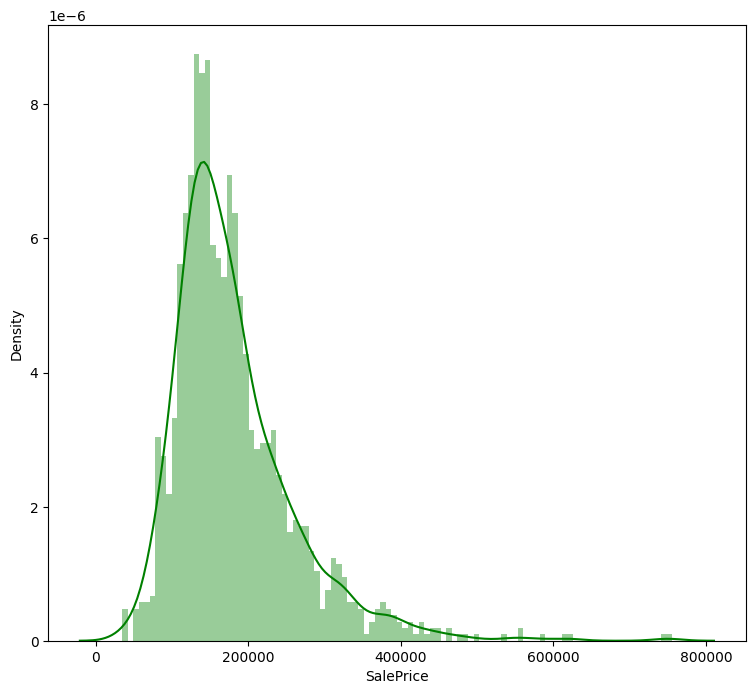

In [9]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# Numerical data distribution


Now we will take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

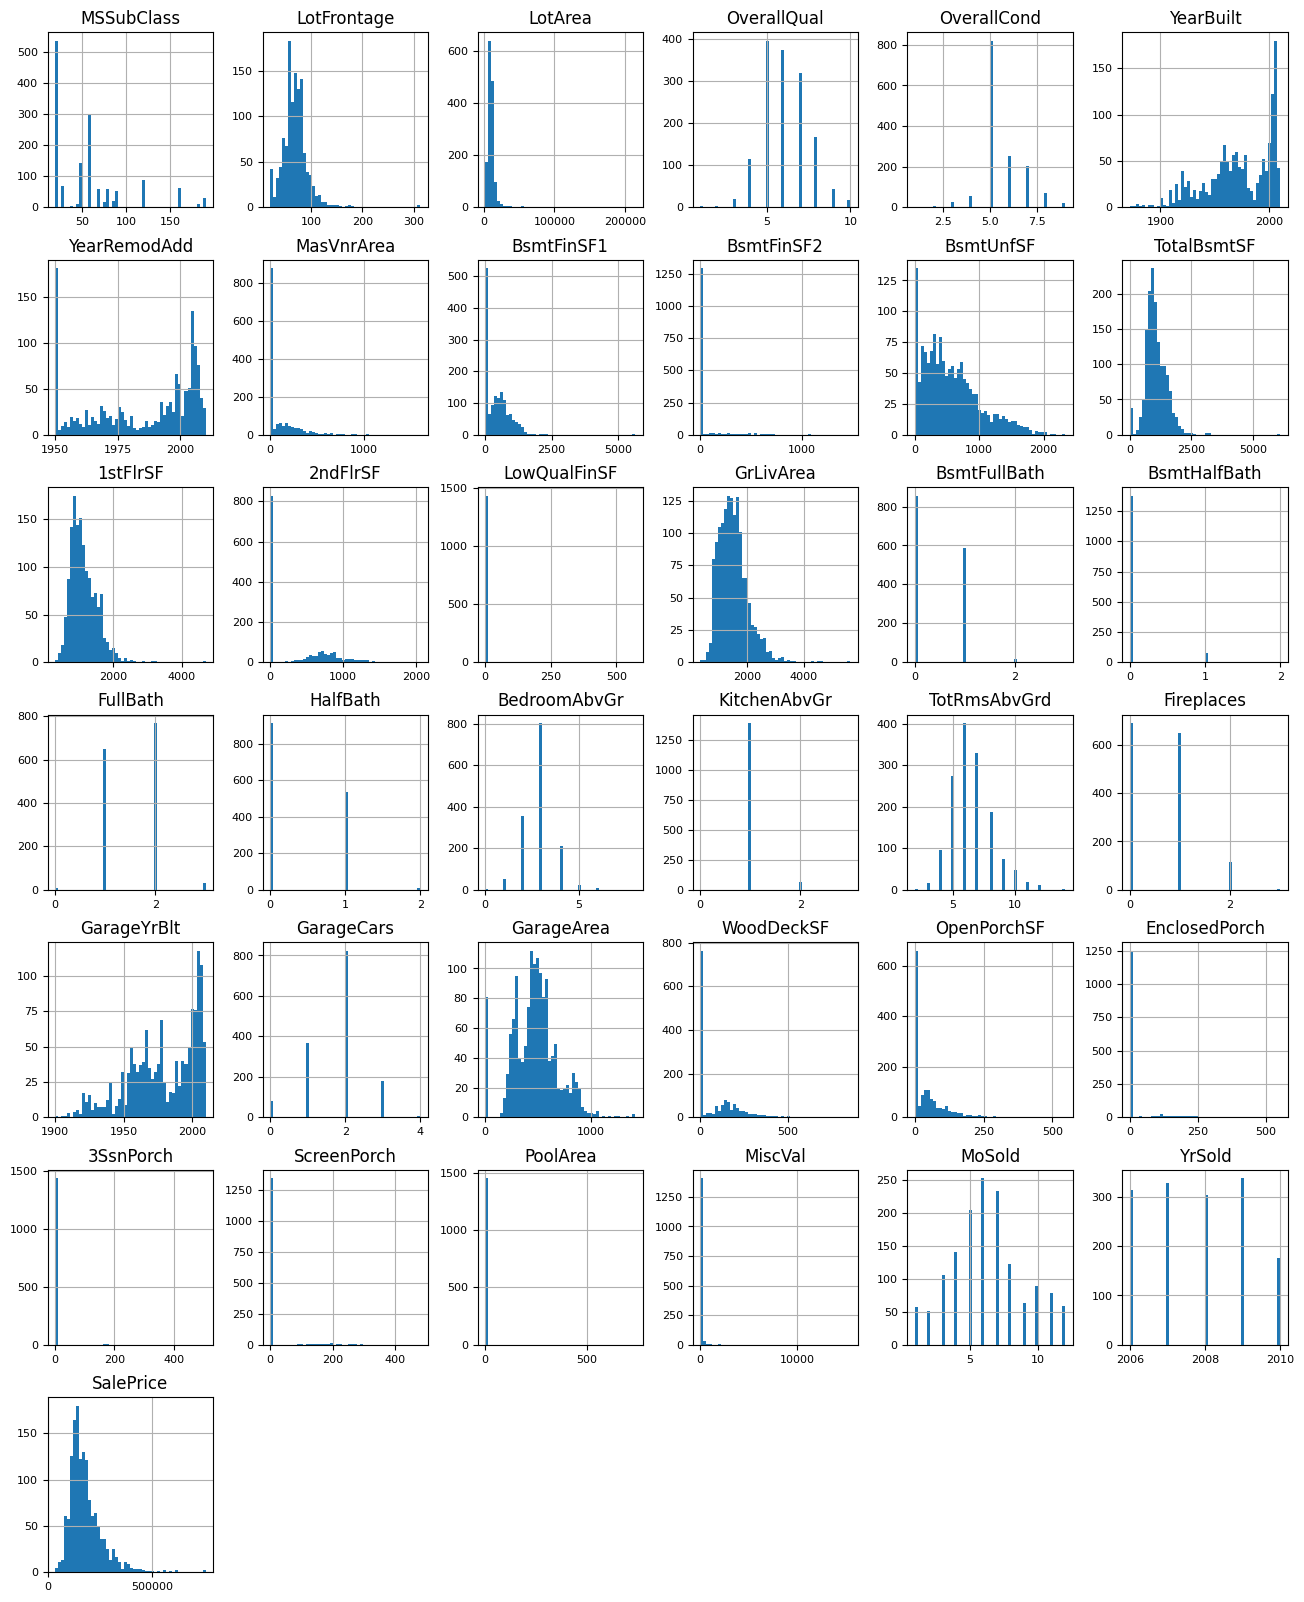

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Data preprocessing


*   Variable Corellation
*   Check NULL Values
*   Check Missing data
*   check outliters (clean/smooth the data)
*   Handle Categorical data (drop/encode)
*   Feature Engineering: Price per square foot = Price / Square Footage
Age of house = Current Year - Year Built
*  Data Scaling  




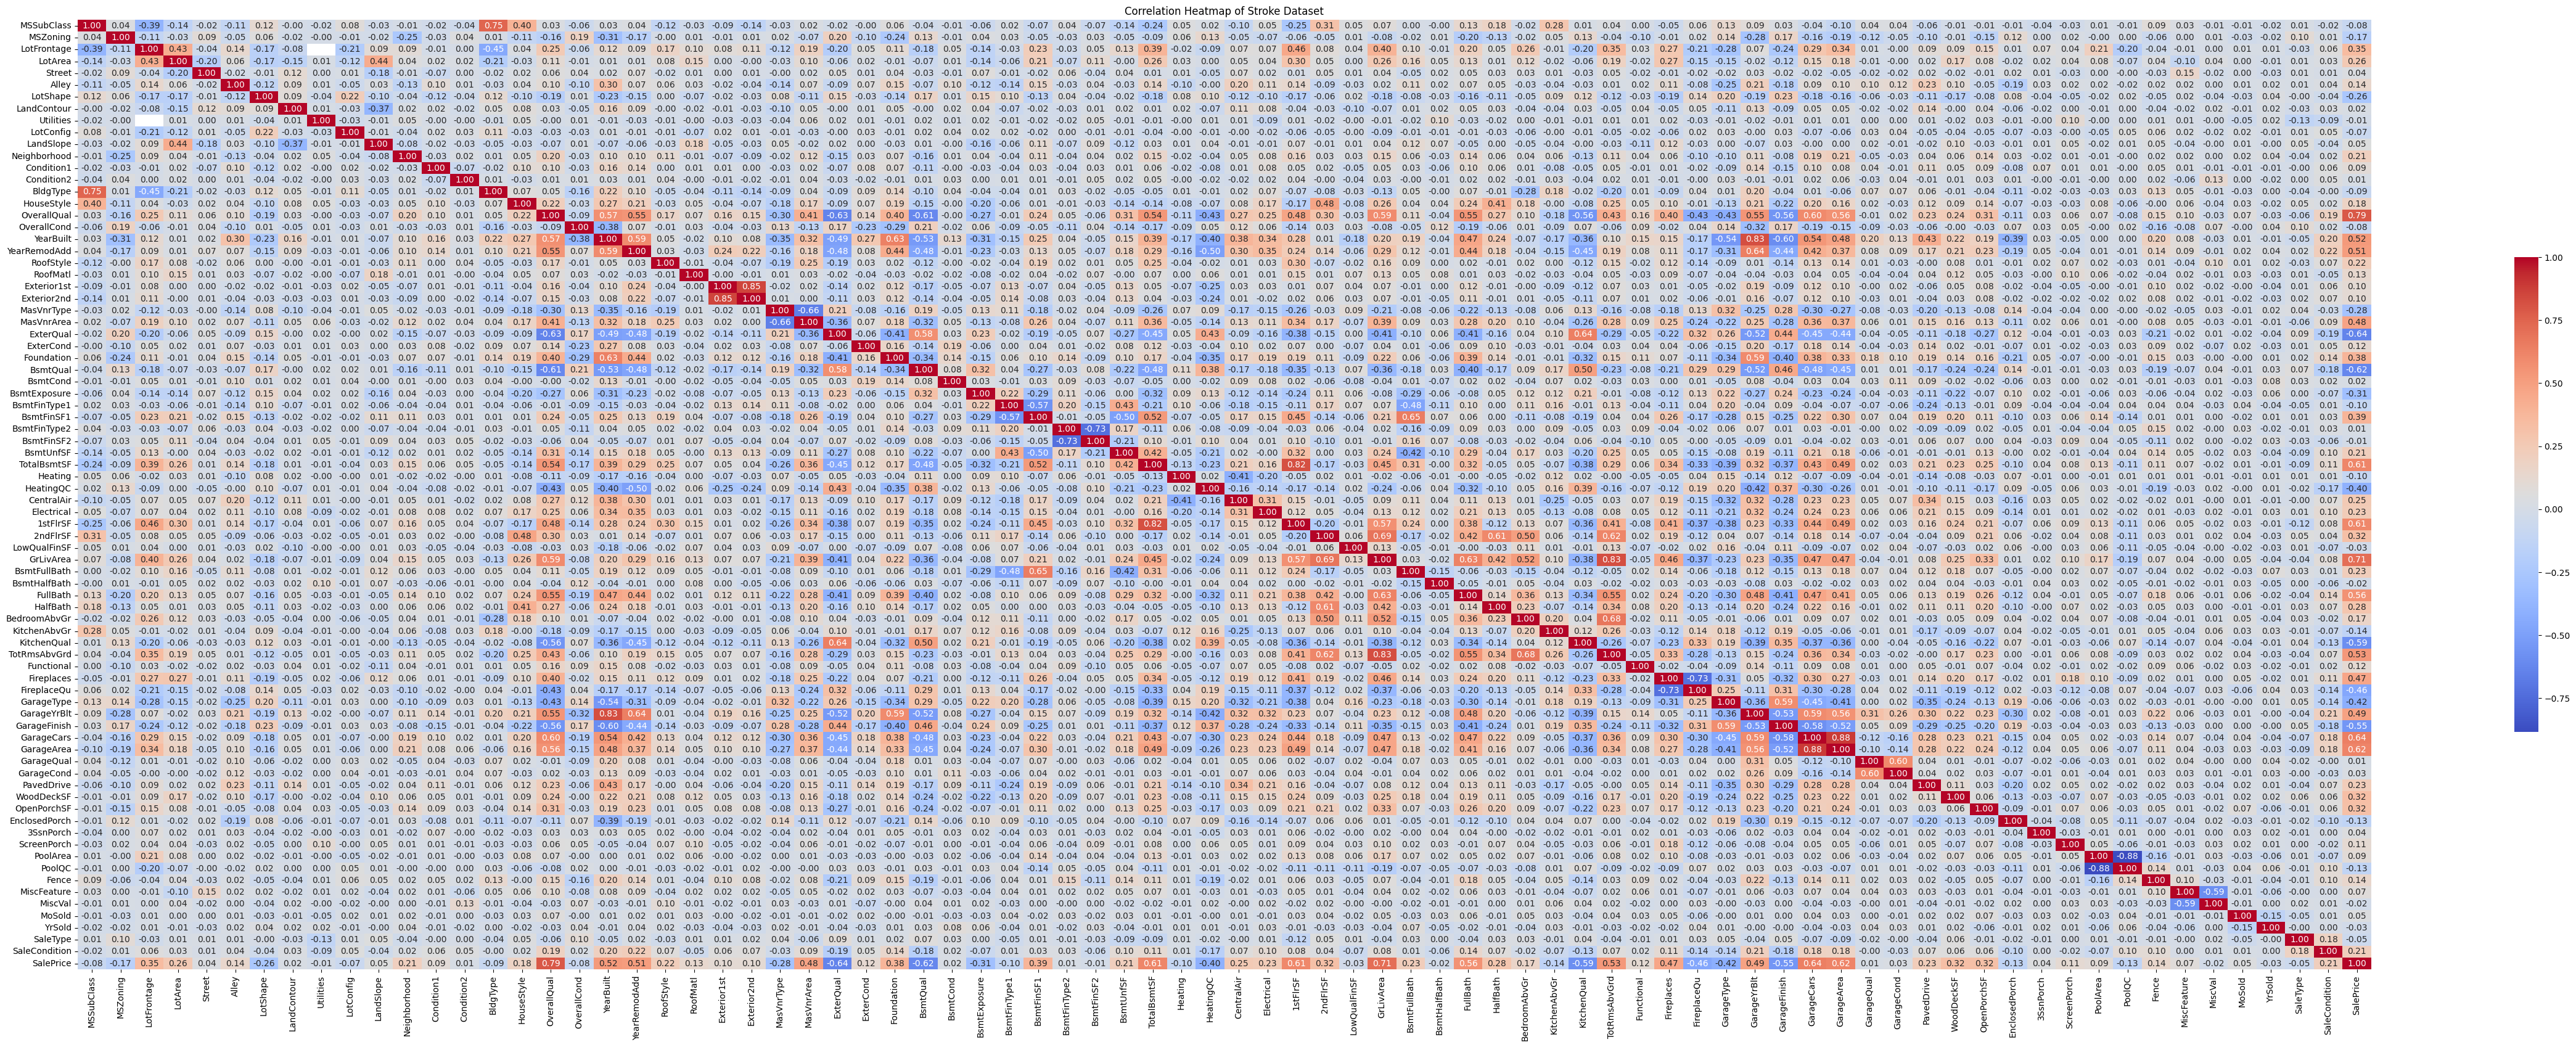

In [ ]:
cc = dataset_df.copy(deep=True)

# Initialize the label encoder
ss = preprocessing.LabelEncoder()

# Automatically detect categorical columns
categorical_columns = cc.select_dtypes(include=['object']).columns

# Encode all categorical columns
for col in categorical_columns:
    cc[col] = ss.fit_transform(cc[col])

# Compute the correlation matrix
corr_matrix = cc.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(60, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap of Stroke Dataset')
plt.show()

In [ ]:
display(corr_matrix)

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.035900    -0.386347 -0.139781 -0.024969   
MSZoning         0.035900  1.000000    -0.111690 -0.034452  0.087654   
LotFrontage     -0.386347 -0.111690     1.000000  0.426095 -0.040886   
LotArea         -0.139781 -0.034452     0.426095  1.000000 -0.197131   
Street          -0.024969  0.087654    -0.040886 -0.197131  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.013585 -0.031496     0.011200  0.001205  0.003690   
YrSold          -0.021407 -0.020628     0.007450 -0.014261 -0.025043   
SaleType         0.012464  0.097437    -0.034559  0.012292  0.014339   
SaleCondition   -0.024940  0.009494     0.063372  0.034169  0.006064   
SalePrice       -0.084284 -0.166872     0.351799  0.263843  0.041036   

                  Alley  LotShape  LandContour  Utilities  LotConfig  ...  \
MSSubClass    -0.105995  0.119289    -0.002940  -0.022844   0.075910  ...   
MSZoning      -0.052039  0.061887    -0.017854  -0.001192  -0.009895  ...   
LotFrontage    0.138101 -0.169641    -0.080757        NaN  -0.208276  ...   
LotArea        0.060105 -0.165315    -0.149083   0.010123  -0.121161  ...   
Street        -0.015720 -0.010224     0.115995   0.001682   0.013960  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold         0.013094 -0.033455    -0.011599  -0.051552   0.018902  ...   
YrSold         0.020944  0.036449     0.020507   0.023353  -0.005992  ...   
SaleType       0.008205 -0.000911    -0.025754  -0.126770   0.014325  ...   
SaleCondition  0.035717 -0.038118     0.033809  -0.089701   0.051579  ...   
SalePrice      0.139868 -0.255580     0.015453  -0.014314  -0.067396  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
MSSubClass     0.008283 -0.005221  0.086360     0.034859 -0.007683 -0.013585   
MSZoning      -0.003128  0.002882 -0.061289     0.000673  0.009293 -0.031496   
LotFrontage    0.206167 -0.195051 -0.040862    -0.006629  0.003368  0.011200   
LotArea        0.077672 -0.065167  0.036031    -0.103544  0.038068  0.001205   
Street         0.004413 -0.004067 -0.029386     0.146712 -0.022733  0.003690   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.033737  0.036368 -0.009892    -0.014193 -0.006495  1.000000   
YrSold        -0.059689  0.060904 -0.035366    -0.055962  0.004906 -0.145721   
SaleType       0.011009 -0.013592 -0.006154    -0.003311  0.015773 -0.047386   
SaleCondition -0.067251  0.097425  0.100675     0.003192  0.013027  0.013320   
SalePrice      0.092404 -0.126070  0.140640     0.073609 -0.021190  0.046432   

                 YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass    -0.021407  0.012464      -0.024940  -0.084284  
MSZoning      -0.020628  0.097437       0.009494  -0.166872  
LotFrontage    0.007450 -0.034559       0.063372   0.351799  
LotArea       -0.014261  0.012292       0.034169   0.263843  
Street        -0.025043  0.014339       0.006064   0.041036  
...                 ...       ...            ...        ...  
MoSold        -0.145721 -0.047386       0.013320   0.046432  
YrSold         1.000000 -0.002327       0.003880  -0.028923  
SaleType      -0.002327  1.000000       0.184067  -0.054911  
SaleCondition  0.003880  0.184067       1.000000   0.213092  
SalePrice     -0.028923 -0.054911       0.213092   1.000000  

[80 rows x 80 columns]

**Check Missing Data**

In [ ]:
# Calculate missing values and percentage
missing_data = dataset_df.isnull().sum()
missing_percentage = (missing_data / len(dataset_df)) * 100

# Create a DataFrame for missing data
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': missing_percentage.values
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display in chunks of 20 rows
for i in range(0, len(missing_summary), 20):
    print(missing_summary.iloc[i:i+20])
    print("\n")


          Column  Missing Values  Percentage
2    LotFrontage             259   17.739726
5          Alley            1369   93.767123
24    MasVnrType             872   59.726027
25    MasVnrArea               8    0.547945
29      BsmtQual              37    2.534247
30      BsmtCond              37    2.534247
31  BsmtExposure              38    2.602740
32  BsmtFinType1              37    2.534247
34  BsmtFinType2              38    2.602740
41    Electrical               1    0.068493
56   FireplaceQu             690   47.260274
57    GarageType              81    5.547945
58   GarageYrBlt              81    5.547945
59  GarageFinish              81    5.547945
62    GarageQual              81    5.547945
63    GarageCond              81    5.547945
71        PoolQC            1453   99.520548
72         Fence            1179   80.753425
73   MiscFeature            1406   96.301370




In [ ]:
# Calculate missing values and percentage
missing_data = df_num.isnull().sum()
missing_percentage = (missing_data / len(df_num)) * 100

# Create a DataFrame for missing data
missing_summary1 = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': missing_percentage.values
})

# Filter only columns with missing values
missing_summary1 = missing_summary1[missing_summary1['Missing Values'] > 0]

# Display in chunks of 20 rows
for i in range(0, len(missing_summary1), 20):
    print(missing_summary1.iloc[i:i+20])
    print("\n")


         Column  Missing Values  Percentage
1   LotFrontage             259   17.739726
7    MasVnrArea               8    0.547945
24  GarageYrBlt              81    5.547945




In [ ]:
num_cols_all = dataset_df.shape[1]
print(f'The dataset has {num_cols_all} columns.')

The dataset has 80 columns.


In [ ]:
num_cols_num = df_num.shape[1]
print(f'The dataset has {num_cols_num} columns.')

The dataset has 37 columns.


In [ ]:
print(dataset_df.isnull().sum().sum())



7829


In [ ]:
missing_summary['Missing Values'].sum()

7829

# Data Preprocesisng Osama

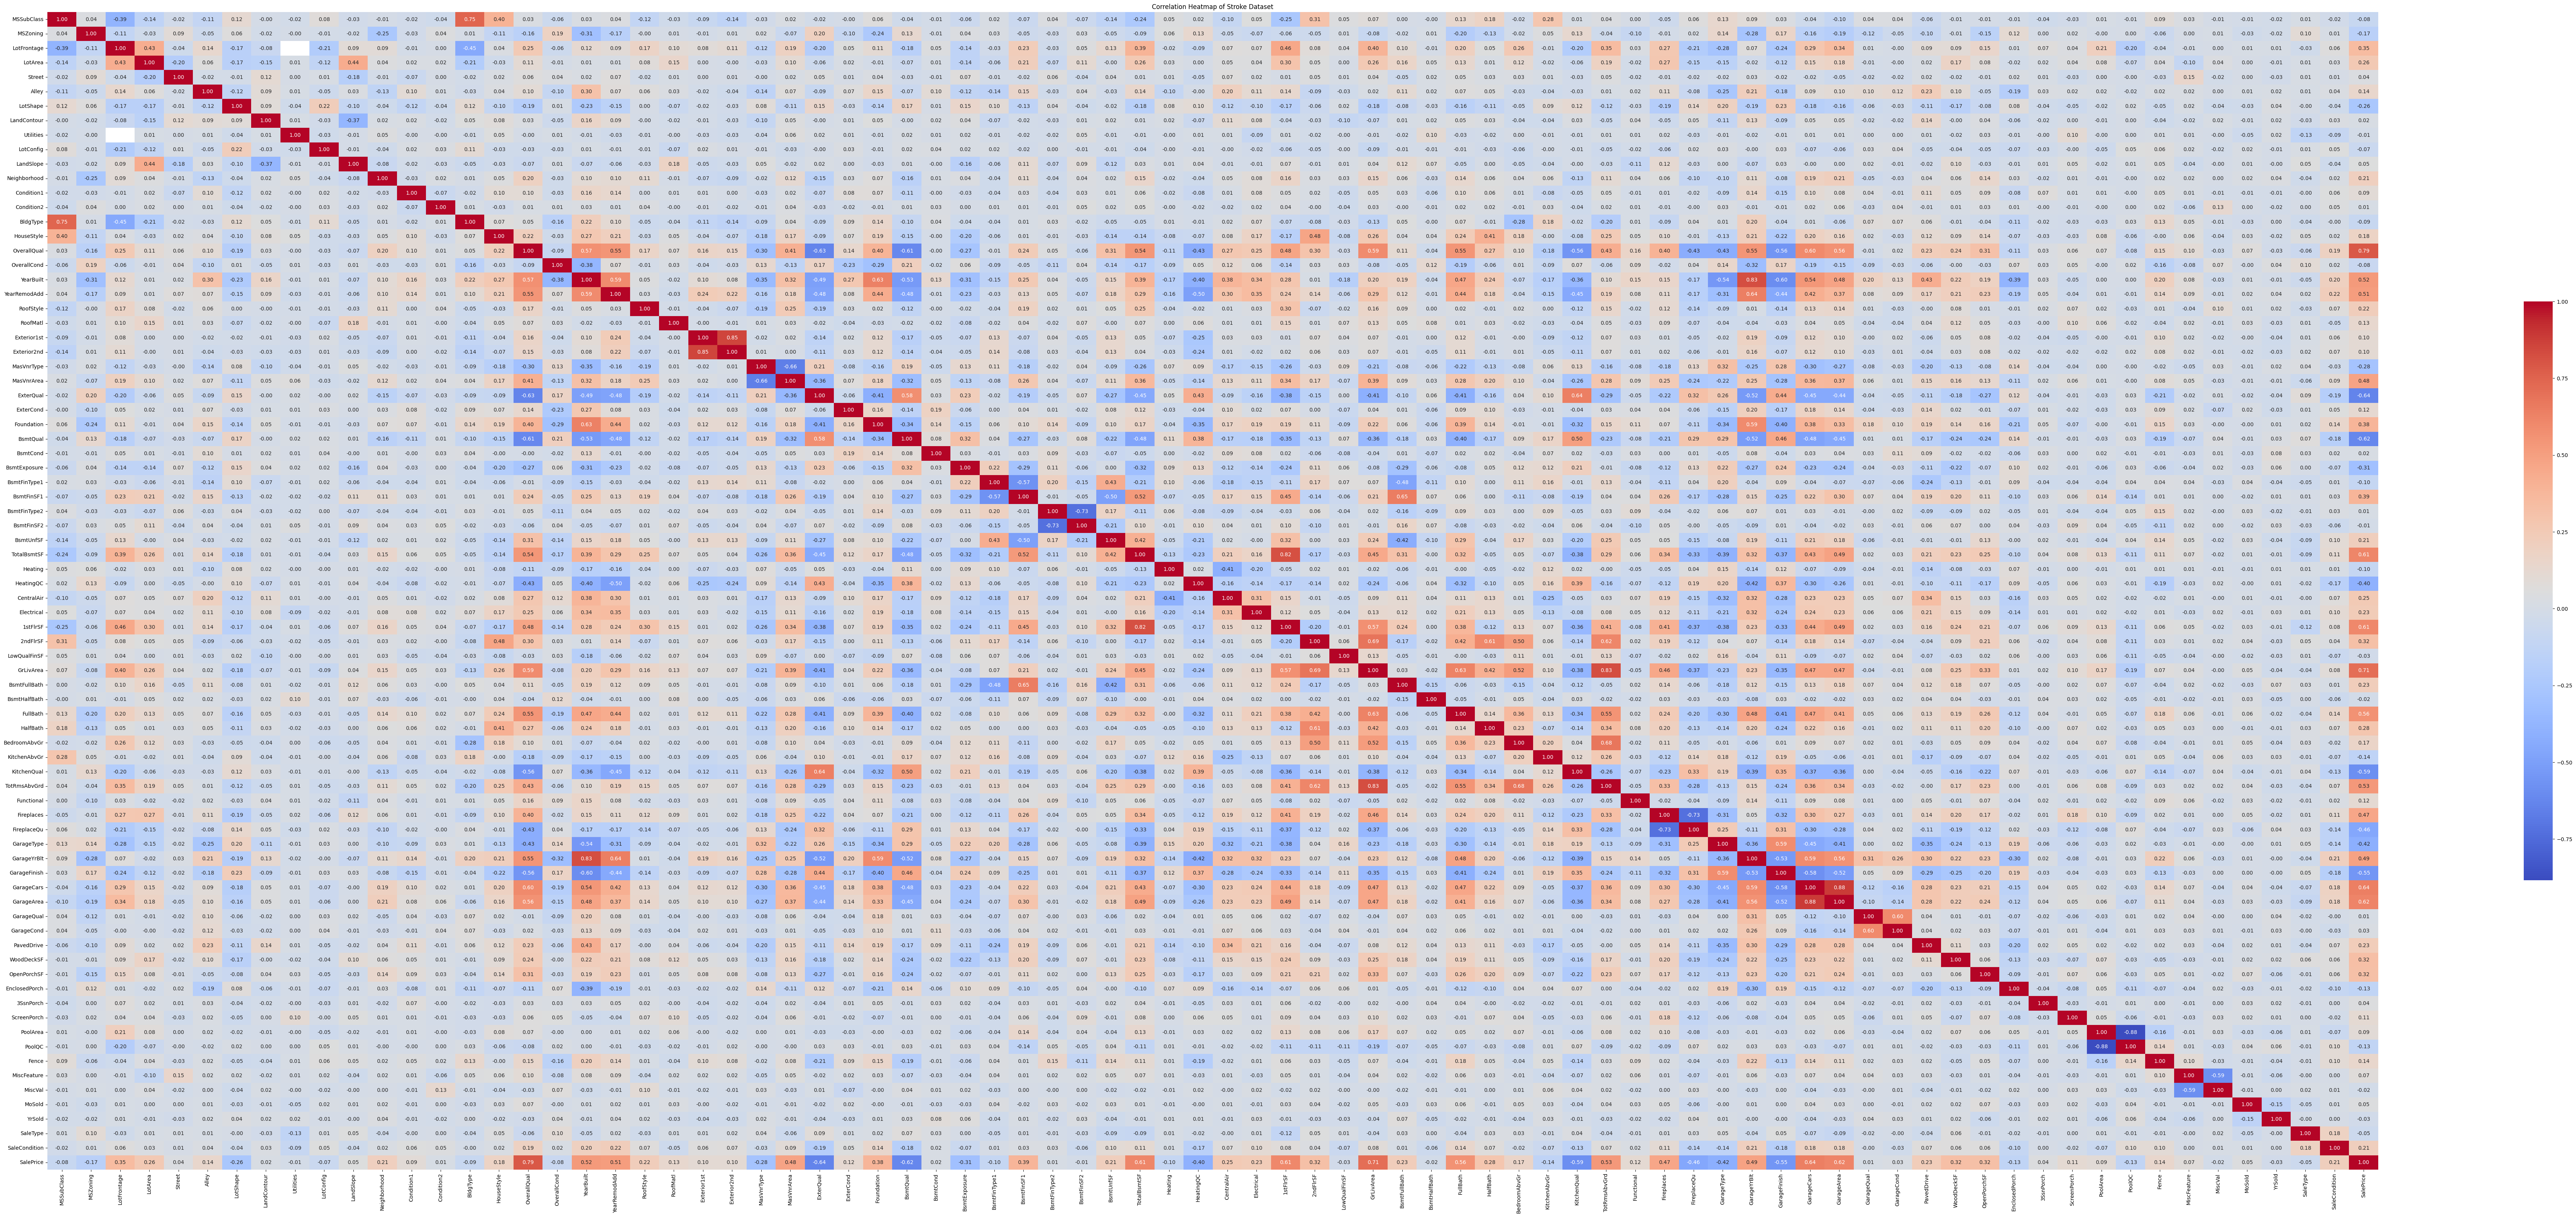

In [12]:
cc = dataset_df.copy(deep=True)

# Initialize the label encoder
ss = preprocessing.LabelEncoder()

# Automatically detect categorical columns
categorical_columns = cc.select_dtypes(include=['object']).columns

# Encode all categorical columns
for col in categorical_columns:
    cc[col] = ss.fit_transform(cc[col])

# Compute the correlation matrix
corr_matrix = cc.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(100, 40))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap of Stroke Dataset')
plt.show()

In [26]:
num_cols_all = dataset_df.shape[1]
print(f'The dataset has {num_cols_all} columns.')

The dataset has 80 columns.


In [27]:
# Check for missing values and data types
missing_data = dataset_df.isnull().sum()  # Get the count of missing values for each column
missing_percentage = (missing_data / len(dataset_df)) * 100  # Calculate percentage of missing values

# Create a summary DataFrame with missing values and data types
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': missing_percentage.values,
    'Data Type': dataset_df.dtypes.values
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display the summary
print(missing_summary)

# Save the summary to a CSV for easier inspection (optional)
missing_summary.to_csv("missing_data_summary.csv", index=False)
print("Summary saved to 'missing_data_summary.csv'.")

          Column  Missing Values  Percentage Data Type
2    LotFrontage             259   17.739726   float64
5          Alley            1369   93.767123    object
24    MasVnrType             872   59.726027    object
25    MasVnrArea               8    0.547945   float64
29      BsmtQual              37    2.534247    object
30      BsmtCond              37    2.534247    object
31  BsmtExposure              38    2.602740    object
32  BsmtFinType1              37    2.534247    object
34  BsmtFinType2              38    2.602740    object
41    Electrical               1    0.068493    object
56   FireplaceQu             690   47.260274    object
57    GarageType              81    5.547945    object
58   GarageYrBlt              81    5.547945   float64
59  GarageFinish              81    5.547945    object
62    GarageQual              81    5.547945    object
63    GarageCond              81    5.547945    object
71        PoolQC            1453   99.520548    object
72        

Drop columns with High Missing Values (> 20%)
* Alley (93.77%)
* MasVnrType (59.73%)
* FireplaceQu (47.26%)
* PoolQC (99.52%)
* Fence (80.75%)
* MiscFeature (96.30%)




In [28]:
dataset_df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Columns with Few Missing Values (5-20%), will be handeled using multivariate imputing. To do so the categorical data must be encoded and we will use Label encoding

* GarageType, GarageFinish, GarageQual, GarageCond (5.55%)
* Electrical (0.06%)
* LotFrontage (17.74%)
* Bsmt-related columns (Qual, Cond, Exposure, etc.) (~2.5%)

In [29]:
# Identify all categorical columns (object and category types)
categorical_cols = dataset_df.select_dtypes(include=['object', 'category']).columns

# Print the categorical columns and their count
print(f"Categorical columns: {categorical_cols.tolist()}")
print(f"Total number of categorical columns: {len(categorical_cols)}")

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Total number of categorical columns: 37


In [30]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    dataset_df[col] = le.fit_transform(dataset_df[col].astype(str))
    label_encoders[col] = le

dataset_df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 74 columns]

In [37]:
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state=0)
data_imputed = imputer.fit_transform(dataset_df)
data_imputed = pd.DataFrame(data_imputed, columns=dataset_df.columns)
data_imputed.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0        60.0       3.0         65.0   8450.0     1.0       3.0          3.0   
1        20.0       3.0         80.0   9600.0     1.0       3.0          3.0   
2        60.0       3.0         68.0  11250.0     1.0       0.0          3.0   
3        70.0       3.0         60.0   9550.0     1.0       0.0          3.0   
4        60.0       3.0         84.0  14260.0     1.0       0.0          3.0   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0        0.0        4.0        0.0  ...            0.0        0.0   
1        0.0        2.0        0.0  ...            0.0        0.0   
2        0.0        4.0        0.0  ...            0.0        0.0   
3        0.0        0.0        0.0  ...          272.0        0.0   
4        0.0        2.0        0.0  ...            0.0        0.0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0          0.0       0.0      0.0     2.0  2008.0       8.0            4.0   
1          0.0       0.0      0.0     5.0  2007.0       8.0            4.0   
2          0.0       0.0      0.0     9.0  2008.0       8.0            4.0   
3          0.0       0.0      0.0     2.0  2006.0       8.0            0.0   
4          0.0       0.0      0.0    12.0  2008.0       8.0            4.0   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  

[5 rows x 74 columns]

In [42]:
# Check if there are any missing values in the dataset
print(data_imputed.isnull().values.any())
print(data_imputed.isnull().sum().sum())

False
0


# ML Models

# Deep learning models

# Extra